World Happiness Report 2018-2022

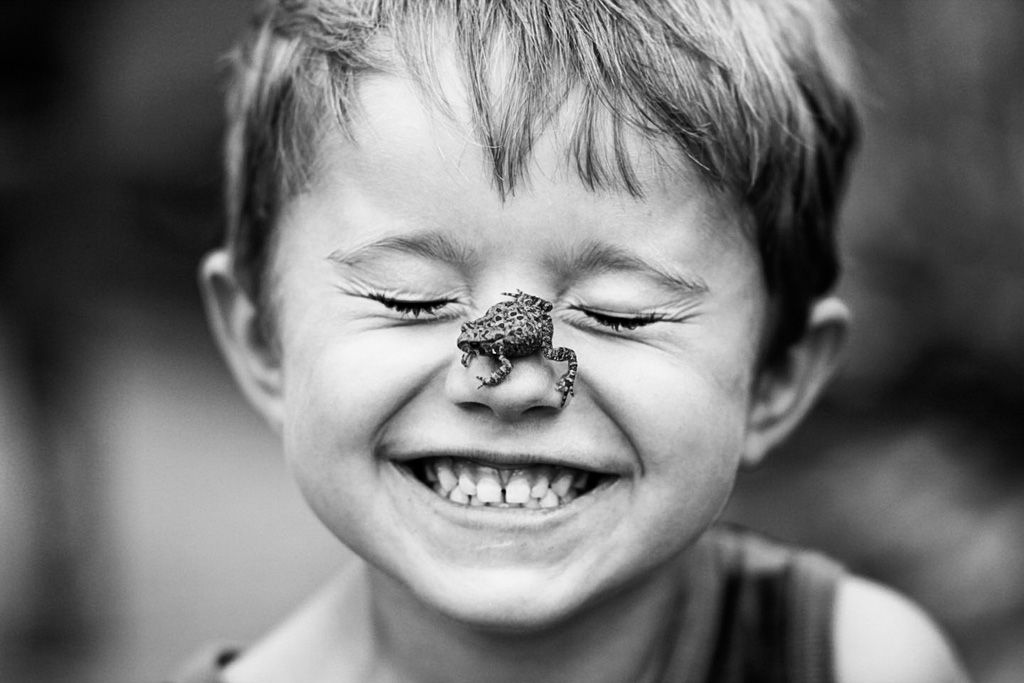

#  Introduction 


    The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. 
    
    This analysis aims to find out the key factors which does the biggest inpact on happines, also to reflect the happiest and unhappiest countries in the world. Data from 2018 to 2022 was used in this case. The following hypothesies were raised:
    
    1. GDP has a strong impact on Happiness score 
    2. Scandinavian countries are amoung dominating countries with a highest Happiness score
    3. Overall Happiness score is tend to increase year by year
  


#  Imports, data preprocessing and cleaning

In [1140]:
# Imports and preparing the dataset

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import os 
os.getcwd()

# Importing 

df18 = pd.read_csv('2018.csv')
df19 = pd.read_csv('2019.csv')
df20 = pd.read_csv('2020.csv')
df21 = pd.read_csv('2021.csv')
df22 = pd.read_csv('2022new.csv')

In [1141]:
df18.shape, df19.shape, df20.shape, df21.shape, df22.shape

# data does not contain equal amount of lines and columns

((156, 9), (156, 9), (153, 20), (149, 20), (147, 13))

In [1142]:
# Add Year column

yrs = ['2018', '2019', '2020', '2021', '2022']
dfs = [df18, df19, df20, df21, df22]
for i in range(0,5):
    dfs[i]['Year'] = yrs[i]

In [1143]:
common_cols = ['Country', 'Region', 'Happiness Score', 'Economy (GDP per Capita)',
               'Family (Social Support)','Health (Life Expectancy)','Freedom', 
               'Trust (Government Corruption)','Generosity','Year']

# define common columns

In [1144]:
df22.head()

,Unnamed: 0,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Year
0,0,1,Finland,7.821,"7,886","7,756","2,518",1.892,1.258,0.775,0.736,0.109,0.534,2022
1,1,2,Denmark,7.636,"7,710","7,563","2,226",1.953,1.243,0.777,0.719,0.188,0.532,2022
2,2,3,Iceland,7.557,"7,651","7,464","2,320",1.936,1.320,0.803,0.718,0.270,0.191,2022
3,3,4,Switzerland,7.512,"7,586","7,437","2,153",2.026,1.226,0.822,0.677,0.147,0.461,2022
4,4,5,Netherlands,7.415,"7,471","7,359","2,137",1.945,1.206,0.787,0.651,0.271,0.419,2022


In [1145]:
df18.columns.to_list()

['Overall rank',
 'Country or region',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Year']

In [1146]:
df18 = df18.rename(columns={'Country or region':'Country',
                            'Score':'Happiness Score',
                            'GDP per capita':'Economy (GDP per Capita)',
                            'Social support':'Family (Social Support)',
                            'Healthy life expectancy':'Health (Life Expectancy)',
                            'Freedom to make life choices':'Freedom',
                            'Perceptions of corruption':'Trust (Government Corruption)'})

# renaming common columns

In [1147]:
df22.head()

,Unnamed: 0,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Year
0,0,1,Finland,7.821,"7,886","7,756","2,518",1.892,1.258,0.775,0.736,0.109,0.534,2022
1,1,2,Denmark,7.636,"7,710","7,563","2,226",1.953,1.243,0.777,0.719,0.188,0.532,2022
2,2,3,Iceland,7.557,"7,651","7,464","2,320",1.936,1.320,0.803,0.718,0.270,0.191,2022
3,3,4,Switzerland,7.512,"7,586","7,437","2,153",2.026,1.226,0.822,0.677,0.147,0.461,2022
4,4,5,Netherlands,7.415,"7,471","7,359","2,137",1.945,1.206,0.787,0.651,0.271,0.419,2022


In [1148]:
df19.columns.to_list()

['Overall rank',
 'Country or region',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Year']

In [1149]:
df19 = df19.rename(columns={'Country or region':'Country',
                            'Score':'Happiness Score',
                            'GDP per capita':'Economy (GDP per Capita)',
                            'Social support':'Family (Social Support)',
                            'Healthy life expectancy':'Health (Life Expectancy)',
                            'Freedom to make life choices':'Freedom',
                            'Perceptions of corruption':'Trust (Government Corruption)'})

In [1150]:
df20.columns.to_list()

['Country name',
 'Regional indicator',
 'Ladder score',
 'Standard error of ladder score',
 'upperwhisker',
 'lowerwhisker',
 'Logged GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Ladder score in Dystopia',
 'Explained by: Log GDP per capita',
 'Explained by: Social support',
 'Explained by: Healthy life expectancy',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Perceptions of corruption',
 'Dystopia + residual',
 'Year']

In [1151]:
df20 = df20.rename(columns={'Country name':'Country',
                            'Regional indicator':'Region',
                            'Ladder score':'Happiness Score',
                            'Logged GDP per capita':'Economy (GDP per Capita)',
                            'Social support':'Family (Social Support)',
                            'Healthy life expectancy':'Health (Life Expectancy)',
                            'Freedom to make life choices':'Freedom',
                            'Perceptions of corruption':'Trust (Government Corruption)'})



In [1152]:
df21 = df21.rename(columns={'Country name':'Country',
                            'Regional indicator':'Region',
                            'Ladder score':'Happiness Score',
                            'Logged GDP per capita':'Economy (GDP per Capita)',
                            'Social support':'Family (Social Support)',
                            'Healthy life expectancy':'Health (Life Expectancy)',
                            'Freedom to make life choices':'Freedom',
                            'Perceptions of corruption':'Trust (Government Corruption)'})

In [1153]:
df22.head()

,Unnamed: 0,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Year
0,0,1,Finland,7.821,"7,886","7,756","2,518",1.892,1.258,0.775,0.736,0.109,0.534,2022
1,1,2,Denmark,7.636,"7,710","7,563","2,226",1.953,1.243,0.777,0.719,0.188,0.532,2022
2,2,3,Iceland,7.557,"7,651","7,464","2,320",1.936,1.320,0.803,0.718,0.270,0.191,2022
3,3,4,Switzerland,7.512,"7,586","7,437","2,153",2.026,1.226,0.822,0.677,0.147,0.461,2022
4,4,5,Netherlands,7.415,"7,471","7,359","2,137",1.945,1.206,0.787,0.651,0.271,0.419,2022


In [1154]:
df22 = df22.rename(columns={'Happiness score':'Happiness Score',
                            'Explained by: GDP per capita':'Economy (GDP per Capita)',
                            'Explained by: Social support':'Family (Social Support)',
                            'Explained by: Healthy life expectancy':'Health (Life Expectancy)',
                            'Explained by: Freedom to make life choices':'Freedom',
                            'Explained by: Generosity':'Generosity',
                            'Explained by: Perceptions of corruption':'Trust (Government Corruption)'})

In [1155]:
df22.head()

,Unnamed: 0,RANK,Country,Happiness Score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,0,1,Finland,7.821,"7,886","7,756","2,518",1.892,1.258,0.775,0.736,0.109,0.534,2022
1,1,2,Denmark,7.636,"7,710","7,563","2,226",1.953,1.243,0.777,0.719,0.188,0.532,2022
2,2,3,Iceland,7.557,"7,651","7,464","2,320",1.936,1.320,0.803,0.718,0.270,0.191,2022
3,3,4,Switzerland,7.512,"7,586","7,437","2,153",2.026,1.226,0.822,0.677,0.147,0.461,2022
4,4,5,Netherlands,7.415,"7,471","7,359","2,137",1.945,1.206,0.787,0.651,0.271,0.419,2022


In [1156]:
df22.columns.to_list()

['Unnamed: 0',
 'RANK',
 'Country',
 'Happiness Score',
 'Whisker-high',
 'Whisker-low',
 'Dystopia (1.83) + residual',
 'Economy (GDP per Capita)',
 'Family (Social Support)',
 'Health (Life Expectancy)',
 'Freedom',
 'Generosity',
 'Trust (Government Corruption)',
 'Year']

In [1157]:
df22.head()

,Unnamed: 0,RANK,Country,Happiness Score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,0,1,Finland,7.821,"7,886","7,756","2,518",1.892,1.258,0.775,0.736,0.109,0.534,2022
1,1,2,Denmark,7.636,"7,710","7,563","2,226",1.953,1.243,0.777,0.719,0.188,0.532,2022
2,2,3,Iceland,7.557,"7,651","7,464","2,320",1.936,1.320,0.803,0.718,0.270,0.191,2022
3,3,4,Switzerland,7.512,"7,586","7,437","2,153",2.026,1.226,0.822,0.677,0.147,0.461,2022
4,4,5,Netherlands,7.415,"7,471","7,359","2,137",1.945,1.206,0.787,0.651,0.271,0.419,2022


In [1158]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     147 non-null    int64  
 1   RANK                           147 non-null    int64  
 2   Country                        147 non-null    object 
 3   Happiness Score                146 non-null    float64
 4   Whisker-high                   146 non-null    object 
 5   Whisker-low                    146 non-null    object 
 6   Dystopia (1.83) + residual     146 non-null    object 
 7   Economy (GDP per Capita)       146 non-null    float64
 8   Family (Social Support)        146 non-null    float64
 9   Health (Life Expectancy)       146 non-null    float64
 10  Freedom                        146 non-null    float64
 11  Generosity                     146 non-null    float64
 12  Trust (Government Corruption)  146 non-null    flo

In [1159]:
# Adding Region column to df18, df19 and df22

df18 = df18.merge(df20[["Country","Region"]], on="Country", how="left")
# df18["Region"] = df18["Region"].fillna('-')
df18

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year,Region
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018,Western Europe
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018,Western Europe
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018,Western Europe
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018,Western Europe
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,2018,Middle East and North Africa
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,2018,Sub-Saharan Africa
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,2018,Sub-Saharan Africa
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,2018,Sub-Saharan Africa


In [1160]:
df19 = df19.merge(df20[["Country","Region"]], on="Country", how="left")
#df19["Region"] = df19["Region"].fillna('-')
df19

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year,Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,Western Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,Western Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,Western Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019,Western Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019,Sub-Saharan Africa
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019,Sub-Saharan Africa
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019,South Asia
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2019,Sub-Saharan Africa


In [1161]:
df22 = df22.merge(df20[["Country","Region"]], on="Country", how="left")
# df22["Region"] = df22["Region"].fillna('-')
df22

,Unnamed: 0,RANK,Country,Happiness Score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year,Region
0,0,1,Finland,7.821,"7,886","7,756","2,518",1.892,1.258,0.775,0.736,0.109,0.534,2022,Western Europe
1,1,2,Denmark,7.636,"7,710","7,563","2,226",1.953,1.243,0.777,0.719,0.188,0.532,2022,Western Europe
2,2,3,Iceland,7.557,"7,651","7,464","2,320",1.936,1.320,0.803,0.718,0.270,0.191,2022,Western Europe
3,3,4,Switzerland,7.512,"7,586","7,437","2,153",2.026,1.226,0.822,0.677,0.147,0.461,2022,Western Europe
4,4,5,Netherlands,7.415,"7,471","7,359","2,137",1.945,1.206,0.787,0.651,0.271,0.419,2022,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,142,143,Rwanda*,3.268,"3,462","3,074","0,536",0.785,0.133,0.462,0.621,0.187,0.544,2022,NaN
143,143,144,Zimbabwe,2.995,"3,110","2,880","0,548",0.947,0.690,0.270,0.329,0.106,0.105,2022,Sub-Saharan Africa
144,144,145,Lebanon,2.955,"3,049","2,862","0,216",1.392,0.498,0.631,0.103,0.082,0.034,2022,Middle East and North Africa
145,145,146,Afghanistan,2.404,"2,469","2,339","1,263",0.758,0.000,0.289,0.000,0.089,0.005,2022,South Asia


In [1162]:
df21 = df21.loc[:,~df21.columns.duplicated(keep='last')]

In [1163]:
df21['Happiness Rank'] = [i for i in range(1, len(df21.index)+1)]

In [1166]:
df19['Region'].value_counts()

#overview of regions

Sub-Saharan Africa                    39
Latin America and Caribbean           20
Western Europe                        20
Middle East and North Africa          17
Central and Eastern Europe            16
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             6
East Asia                              4
North America and ANZ                  4
Name: Region, dtype: int64

In [1167]:
#Merge dfs

dfs = [df18[common_cols], df19[common_cols], df20[common_cols], df21[common_cols], df22[common_cols]]

In [1168]:
# df18.columns.to_list()

In [1169]:
# df22.head()

In [1170]:
df_merged = pd.DataFrame(columns=common_cols)

In [1171]:
df_merged = df_merged.append(dfs)

In [1172]:
df_merged.shape

(761, 10)

In [1173]:
# drop NA values

df_merged.dropna(axis='rows',inplace=True)

In [1174]:
# df_merged.shape

In [1175]:
# df.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [1176]:
# Save the new file

df = df_merged.to_csv('world-happiness-report-2018-2022-cleaned.csv')


# Data overview, key statistics


In [1177]:
df = pd.read_csv('world-happiness-report-2018-2022-cleaned_v3.csv')

In [1178]:
df.info()
# Zero null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     758 non-null    int64  
 1   Unnamed: 0.1                   758 non-null    int64  
 2   Happiness Rank                 758 non-null    int64  
 3   Country                        758 non-null    object 
 4   Region                         758 non-null    object 
 5   Happiness Score                758 non-null    float64
 6   Economy (GDP per Capita)       758 non-null    float64
 7   Family (Social Support)        758 non-null    float64
 8   Health (Life Expectancy)       758 non-null    float64
 9   Freedom                        758 non-null    float64
 10  Trust (Government Corruption)  758 non-null    float64
 11  Generosity                     758 non-null    float64
 12  Year                           758 non-null    int

In [1179]:
df.shape

# shape of data

(758, 13)

In [1180]:
df.drop(['Unnamed: 0'], axis='columns', inplace=True)
df.drop(['Unnamed: 0.1'], axis='columns', inplace=True)

In [1181]:
df.sample(5)

,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
239,85,Nigeria,Sub-Saharan Africa,5.265,0.696,1.111,0.245,0.426,0.041,0.215,2019
23,25,Chile,Latin America and Caribbean,6.476,1.131,1.331,0.808,0.431,0.061,0.197,2018
620,8,Norway,Western Europe,7.365,1.997,1.239,0.786,0.728,0.474,0.217,2022
303,149,Syria,Middle East and Northern Africa,3.462,0.619,0.378,0.440,0.013,0.141,0.331,2019
544,81,Malaysia,Southeast Asia,5.384,1.259,0.797,0.587,0.624,0.064,0.270,2021


In [1182]:
pd.isnull(df).sum()

Happiness Rank                   0
Country                          0
Region                           0
Happiness Score                  0
Economy (GDP per Capita)         0
Family (Social Support)          0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
dtype: int64

In [1184]:
print(df['Region'].value_counts())

# most countries are from Sub-Saharan Africa region and least number of countries from Australia and New Zealand
# and North America

Sub-Saharan Africa                    189
Central and Eastern Europe            121
Western Europe                        105
Latin America and Caribbean           103
Middle East and Northern Africa        50
Middle East and North Africa           37
Southeastern Asia                      27
Commonwealth of Independent States     24
Southern Asia                          20
Southeast Asia                         18
Eastern Asia                           18
South Asia                             14
East Asia                              12
North America and ANZ                   8
North America                           6
Australia and New Zealand               6
Name: Region, dtype: int64


/Users/pro/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



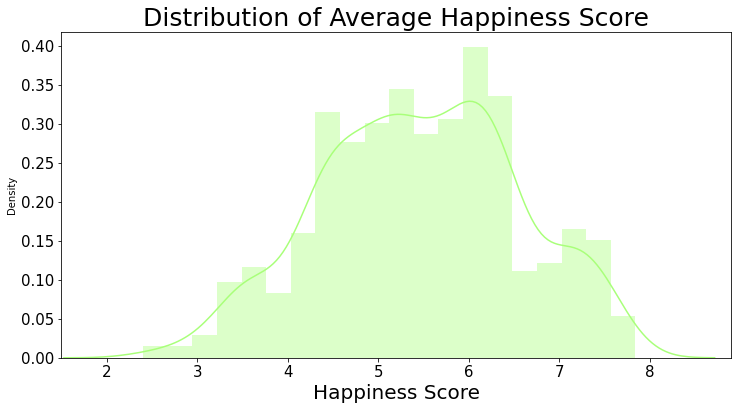

In [1185]:
# Checking the distribution for Happiness Score
plt.figure(figsize = (12, 6))


sns.distplot(a = df['Happiness Score'], bins = 20, kde = True, color = "#A9FF7A")
plt.xlabel('Happiness Score', fontsize = 20)
plt.title('Distribution of Average Happiness Score', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim((1.5, 8.9));

The distribution of happiness is quite platykurtic, spread between a score of ~2,5 and 7.8.

In [1186]:
df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,76.562005,5.466492,1.004410,1.060087,0.626057,0.464845,0.128224,0.176609,2019.964380
std,43.969675,1.100660,0.443320,0.333662,0.240236,0.152166,0.110578,0.096224,1.409553
min,1.000000,2.404000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000
25%,39.000000,4.644250,0.691500,0.848000,0.457000,0.379250,0.054339,0.105250,2019.000000
50%,76.500000,5.477000,1.022957,1.095000,0.654000,0.488000,0.093748,0.166000,2020.000000
75%,114.000000,6.223000,1.322809,1.322579,0.800500,0.580750,0.160885,0.237768,2021.000000
max,156.000000,7.842000,2.209000,1.644000,1.141000,0.740000,0.587000,0.598000,2022.000000


Average Happiness score is 5.47 (out of 10), min 2.4 and max 7.84

# Hypothesis testing

## H1: GDP has a strong impact on Happiness score

In [1187]:
df.corr()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
Happiness Rank,1.000000,-0.986129,-0.725602,-0.626924,-0.722669,-0.563673,-0.384630,-0.031552,-0.047825
Happiness Score,-0.986129,1.000000,0.719106,0.625383,0.714729,0.575475,0.411225,0.058029,0.066070
Economy (GDP per Capita),-0.725602,0.719106,1.000000,0.436494,0.655750,0.434550,0.351658,-0.167136,0.352774
Family (Social Support),-0.626924,0.625383,0.436494,1.000000,0.697388,0.256859,0.115705,0.009506,-0.437569
Health (Life Expectancy),-0.722669,0.714729,0.655750,0.697388,1.000000,0.302793,0.289770,-0.039377,-0.128714
Freedom,-0.563673,0.575475,0.434550,0.256859,0.302793,1.000000,0.435174,0.194857,0.214896
Trust (Government Corruption),-0.384630,0.411225,0.351658,0.115705,0.289770,0.435174,1.000000,0.217424,0.139944
Generosity,-0.031552,0.058029,-0.167136,0.009506,-0.039377,0.194857,0.217424,1.000000,-0.104043
Year,-0.047825,0.066070,0.352774,-0.437569,-0.128714,0.214896,0.139944,-0.104043,1.000000


Strong positive correlation with Happiness score and GDP (0.72)

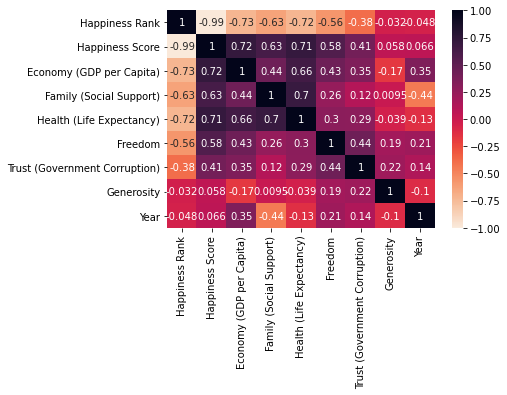

In [1188]:
import seaborn as sns

sns.heatmap(df.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()

Happiness score also has strong level correlation with Social Support and Life Expectancy.

Life expectancy and GDP has a strong correlation (in counties with higher income obviouly have a higher chance to live longer).

Freedom to make life choice, Perception of corruption and happiness score have mid level correlation between them.



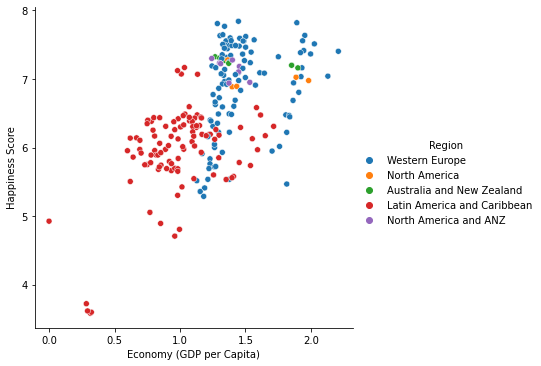

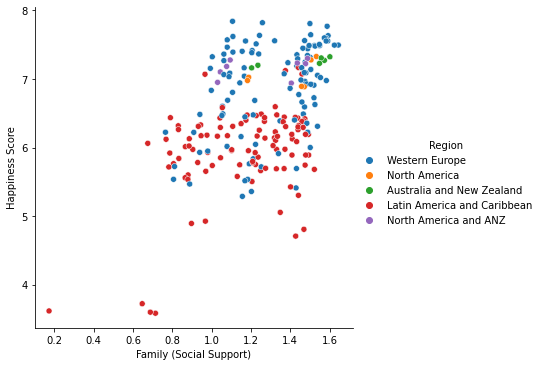

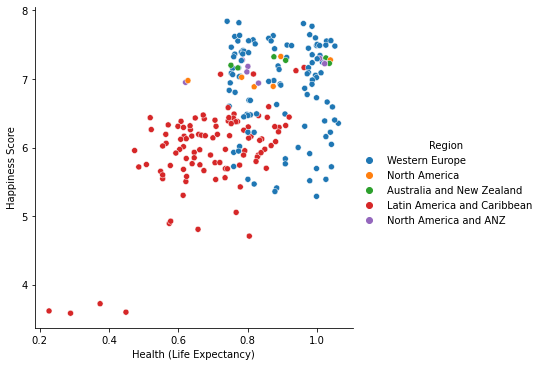

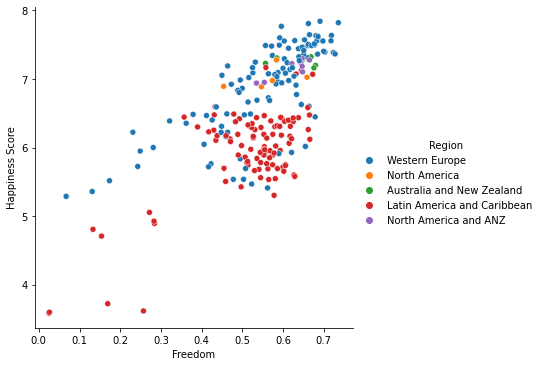

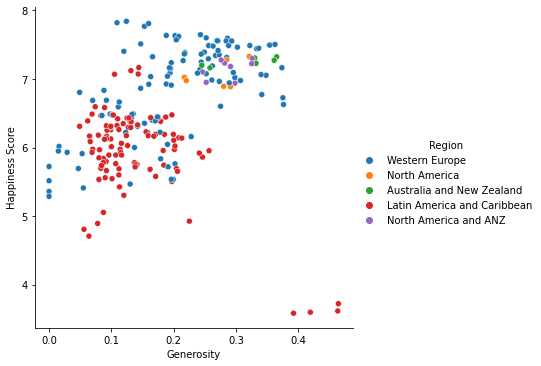

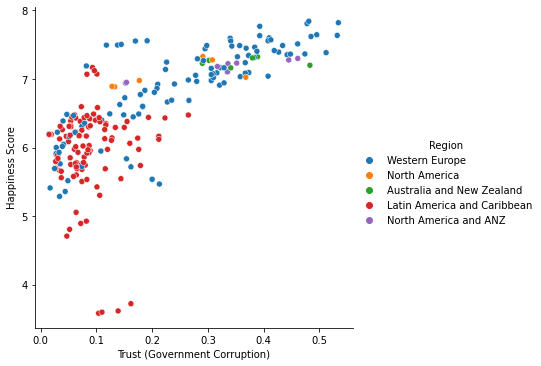

In [1189]:
for col in df[['Economy (GDP per Capita)', 'Family (Social Support)', 'Health (Life Expectancy)',
       'Freedom', 'Generosity',
       'Trust (Government Corruption)']]:
    sns.relplot(
        data = df[df['Region'].isin(df.groupby('Region').mean().sort_values(by = 'Happiness Score', ascending = False)[:5].index)],
        x= col, y="Happiness Score",
        hue="Region")
# From the above, Lineplots and relationplots,for most of the regions, 
# seeing a straight relationship between the positive factors and for negative an inverse.

## H2: Scandinavian countries are amoung dominating countries with a highest Happiness score

In [1190]:
df.groupby('Region')['Happiness Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Australia and New Zealand,6.0,7.248833,0.063133,7.1620,7.207000,7.25000,7.298250,7.3240
Central and Eastern Europe,121.0,5.716388,0.581888,4.1030,5.321000,5.79000,6.140000,6.9650
Commonwealth of Independent States,24.0,5.412671,0.482237,4.5607,5.105825,5.50550,5.641625,6.2576
East Asia,12.0,5.762592,0.431746,5.1239,5.471800,5.76100,5.889300,6.5840
Eastern Asia,18.0,5.745667,0.437469,5.1250,5.426250,5.81800,5.930000,6.5120
Latin America and Caribbean,103.0,5.949335,0.642542,3.5820,5.745250,6.08600,6.313000,7.1670
Middle East and North Africa,37.0,5.199559,0.971251,3.5274,4.552800,4.88700,6.106000,7.1570
Middle East and Northern Africa,50.0,5.217540,1.050942,2.9550,4.524000,5.17900,6.099500,7.3640
North America,6.0,7.064333,0.192795,6.8860,6.913250,7.00100,7.214750,7.3280


Western Europe has the highest level happiness score (mean)

South Asia and Sub-Saharan Africa have the lowest level happiness score amongst the regions.

In [1191]:
fig = px.box(df, x= 'Happiness Score', y='Region',hover_data = df[['Region','Country']])
fig.update_traces(quartilemethod="inclusive")
fig.show()

In the boxplot, based on the happiness score distributions on the regions, several outliers were seen in the:

1. Latin America and Caribbean (lowest score in Haiti)
2. East Asia (highest score in East Asia)
3. The lowest overall Happiness score is in Afghanistan 2.4
4. North America and ANZ, Australia and New Zealand the box plot is very different.
One reason could be there are lesser number of countries in this data.
5. Wide range of distribution in Middle and North Africa

In [1192]:
westen_europe = df[df['Region']=='Western Europe']


In [1193]:
fig = px.box(western_europe, x= 'Happiness Score', hover_data = western_europe[['Country']])
fig.update_traces(quartilemethod="inclusive")
fig.show()

# Happiness score distribution in Western Europe

In [1194]:
color_discrete_sequence = ['#ec7c34']*len(df)
color_discrete_sequence[0] = '#609cd4'

fig = px.bar(western_europe, x='Happiness Score', y='Country', orientation='h', color = 'Country',
            color_discrete_sequence=color_discrete_sequence)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()




Graph shows accumulated scores 2018-2021
North Cyprus and Greece have lowest schores in Western Europe 
Finland has the overal highest happiness score in the Western Europe.


2nd hypothesis was correct, that Scandinavian counties own top scores: Finland, Norway , Denmark, Iceland.
Sweden is in 7th place

In [1195]:
df.sort_values(
...     by="Happiness Score",
...     ascending=False
... )[0:7]



,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
464,1,Finland,Western Europe,7.8420,1.446000,1.106000,0.741000,0.691000,0.481000,0.124000,2021
613,1,Finland,Western Europe,7.8210,1.892000,1.258000,0.775000,0.736000,0.534000,0.109000,2022
311,1,Finland,Western Europe,7.8087,1.285190,1.499526,0.961271,0.662317,0.477857,0.159670,2020
155,1,Finland,Western Europe,7.7690,1.340000,1.587000,0.986000,0.596000,0.393000,0.153000,2019
312,2,Denmark,Western Europe,7.6456,1.326949,1.503449,0.979333,0.665040,0.495260,0.242793,2020
614,2,Denmark,Western Europe,7.6360,1.953000,1.243000,0.777000,0.719000,0.532000,0.188000,2022
0,1,Finland,Western Europe,7.6320,1.305000,1.592000,0.874000,0.681000,0.393000,0.202000,2018


Finland had a highest Happiness Score 5 years in a row

In [1196]:
df.sort_values(
...     by="Trust (Government Corruption)",
...     ascending=False
... )[0:5]


,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
639,27,Singapore,Southeastern Asia,6.4800,2.14900,1.127000,0.851000,0.672000,0.587000,0.163000,2022
495,32,Singapore,Southeast Asia,6.3770,1.69500,1.019000,0.897000,0.664000,0.547000,0.176000,2021
754,143,Rwanda,Sub-Saharan Africa,3.2680,0.78500,0.133000,0.462000,0.621000,0.544000,0.187000,2022
613,1,Finland,Western Europe,7.8210,1.89200,1.258000,0.775000,0.736000,0.534000,0.109000,2022
341,31,Singapore,Southeast Asia,6.3771,1.51958,1.395457,1.137814,0.635317,0.533162,0.218771,2020


Finland is also among the counties with a highest Government Trust, after Singapore and Rwanda (surprisingly)

In [1197]:
df.groupby('Country')["Happiness Score"].mean().sort_values(ascending=True).head()

# Lowest score

Country
Afghanistan                 2.865780
South Sudan                 2.974533
Central African Republic    3.213967
Rwanda                      3.347460
Zimbabwe                    3.358840
Name: Happiness Score, dtype: float64

Based on the data, least happiest people live in Afghanistan, South Sudan, Central African Republic, Rwanda and Zimbabwe

In [1198]:
data = dict(
        type = 'choropleth',
        colorscale = 'ylgn',
         marker_line_width=1,
        locations = df['Country'],
        locationmode = "country names",
        z = df['Happiness Score'],
        text = df['Country'],
        colorbar = {'title' : 'Happiness Score'},
        
      )
layout = dict(title = 'Happiness Map',
              geo = dict(projection = {'type':'mercator'}, showocean = False, showlakes = True, showrivers = True, )
             )
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

##  H3: Checking whether Happiness Score is tend to increase year by year

In [1200]:
df.groupby(by='Year')['Happiness Score'].describe()

# Grouping by year

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2018,155.0,5.366897,1.117433,2.9050,4.4515,5.3580,6.1540,7.6320
2019,156.0,5.407096,1.113120,2.8530,4.5445,5.3795,6.1845,7.7690
2020,153.0,5.473240,1.112270,2.5669,4.7241,5.5150,6.2285,7.8087
2021,149.0,5.532839,1.073924,2.5230,4.8520,5.5340,6.2550,7.8420
2022,145.0,5.561559,1.086306,2.4040,4.8910,5.5780,6.3090,7.8210


Mean is slightly increasing year by year

In [1201]:
# Group the data by year and average the factors
grouped = df.groupby(by = 'Year')[['Happiness Score', 'Economy (GDP per Capita)',
       'Family (Social Support)', 'Health (Life Expectancy)',
       'Freedom', 'Generosity',
       'Trust (Government Corruption)']].mean().reset_index()

# Reconstruct the df by using melt() function
grouped = pd.melt(frame = grouped, id_vars='Year', value_vars=['Happiness Score', 'Economy (GDP per Capita)',
       'Family (Social Support)', 'Health (Life Expectancy)',
       'Freedom', 'Generosity',
       'Trust (Government Corruption)'], var_name='Factor', value_name='Avg_value')

grouped.head()

# Factor - our 7 factors
# Year - the years between 2018 and 2022
# Avg_value - average value of the factor for the year

,Year,Factor,Avg_value
0,2018,Happiness Score,5.366897
1,2019,Happiness Score,5.407096
2,2020,Happiness Score,5.473240
3,2021,Happiness Score,5.532839
4,2022,Happiness Score,5.561559


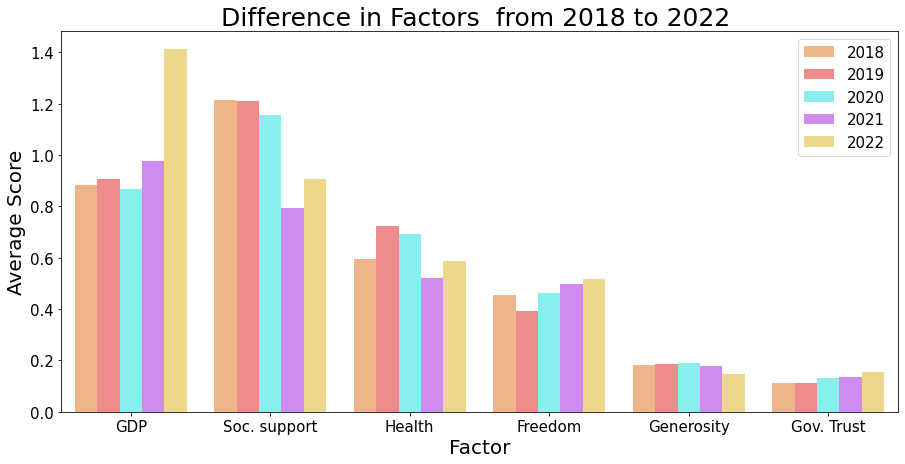

In [1202]:
plt.figure(figsize = (15, 7))

ax = sns.barplot(x = grouped[grouped['Factor'] != 'Happiness Score']['Factor'], y = grouped['Avg_value'], 
            palette = my_palette[4:], hue = grouped['Year'])

plt.title("Difference in Factors  from 2018 to 2022 ", fontsize = 25)
plt.xlabel("Factor", fontsize = 20)
plt.ylabel("Average Score", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

ax.set_xticklabels(['GDP','Soc. support', 'Health', 'Freedom', 'Generosity', 'Gov. Trust']);



Significant increase of GDP in 2022
Decrease of social support perception “If you were in trouble, do you have relatives or 
friends you can count on to help you whenever you need them, or not?”
Freedom to make indepandent decisions is slightly increasing

# Findings and conclusion

All three hypothesis were confirmed, the following key findings to be mentioned:

- Happiness score also has a strong level correlation with GDP,  also with Social Support and Life Expectancy.  Money and health  are the key factors. Following up next is social support, meaning the relationships in a family and the closest group of friends or in other words human interaction is important component of happiness.
- Scandinavians are the happiest people, top scores are owned by: Finland, Norway , Denmark, Iceland. Sweden is in 7th place. Finland had a highest Happiness Score 5 years in a row.
- Nothing surprising that least happies counties are countries in war zones or with poor sanitation systems, diseases or very poor infrastructure (Afghanistan, South Sudan, Central African Republic, Rwanda and Zimbabwe).
- Overall Happiness score is slighty growing year by year, probably the significant 
growth of GDP had a positive effect on this. Also it is worth mentioning that social support was
decreasing in recent years (from 2020), this might be related with COVID-19 pandemic situation and isotation. 
People were lacking of communication and real human interaction.


Some sources claim that this "Happiness measure" is very Eurocentric measure, meaning that in many cases wealthiest countries (with a highest GDP per capita) are being treated as happiest countries. Other researches confirm that the reality is slightly different, some example to mention, Scandinavians have a high suicide rate, they also use a lot of anti-depressants. So we cannot unambiguously assume that even if these countries have the highest Happiness score, the inhabitants of these countries are the happiest people in the world. Probably it is more accurate to say that this index is a social Welfare index, but not Happiness index.